In [1]:
# Developer's setting
%load_ext autoreload
%autoreload 2

In [2]:
import glaft
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../manifest.csv', dtype=str)
in_shp = '/home/jovyan/Projects/PX_comparison/Bedrock_shp/glacier_V1_Kaskawulsh_s_inwardBuffer600m.shp'
# in_shp = '/home/jovyan/Projects/PX_comparison/Bedrock_shp/glacier_V1_Kaskawulsh_s_inwardBuffer300m.shp'

In [4]:
demo = df.loc[79]
demo

Date                                              LS8-20180802-20180818
Duration (days)                                                      16
Template size (px)                                  varying: multi-pass
Template size (m)                                   varying: multi-pass
Pixel spacing (px)                                                4.009
Pixel spacing (m)                                                 60.14
Prefilter                                                          NAOF
Subpixel                                          interest point groups
Software                                                            GIV
Vx                    /home/jovyan/Projects/PX_comparison/PX/GIV/u_l...
Vy                    /home/jovyan/Projects/PX_comparison/PX/GIV/v_l...
Name: 79, dtype: object

In [5]:
demo.Vx

'/home/jovyan/Projects/PX_comparison/PX/GIV/u_l34_NAOF_50.tif'

In [6]:
exp = glaft.Velocity(vxfile=demo.Vx, vyfile=demo.Vy, on_ice_area=in_shp, wfile=demo.Vx.replace('u_', 'pkr_'))

In [7]:
exp.longitudinal_shear_analysis()

Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh


/home/jovyan/.conda/envs/eztrack/lib/python3.9/site-packages/sklearn/neighbors/_kde.py:239: RuntimeWarning: divide by zero encountered in log
  log_density = self.tree_.kernel_density(


Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric


In [8]:
exp.exx.shape

(619, 944)

In [9]:
619 * 944

584336

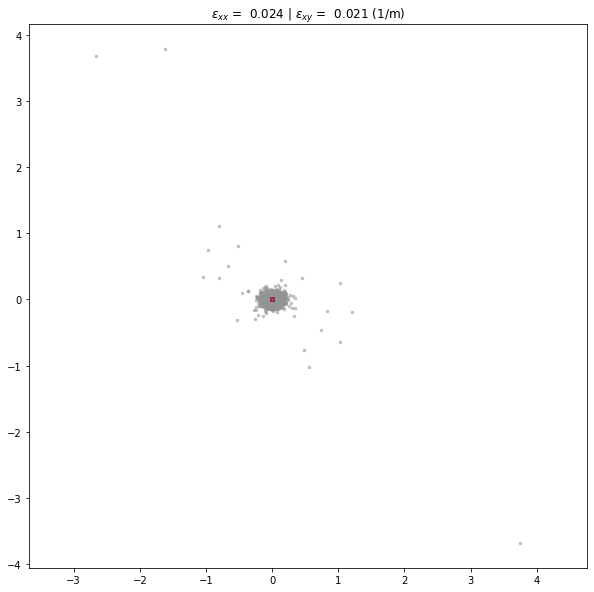

In [10]:
exp.plot_full_extent(metric=2)

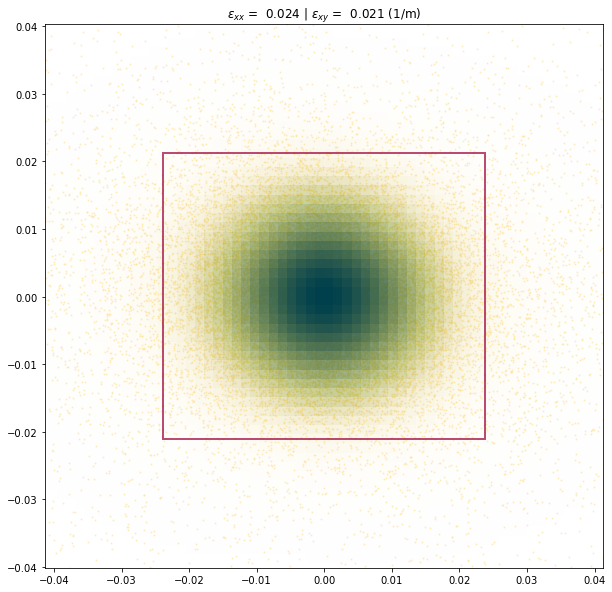

In [11]:
exp.plot_zoomed_extent(metric=2)

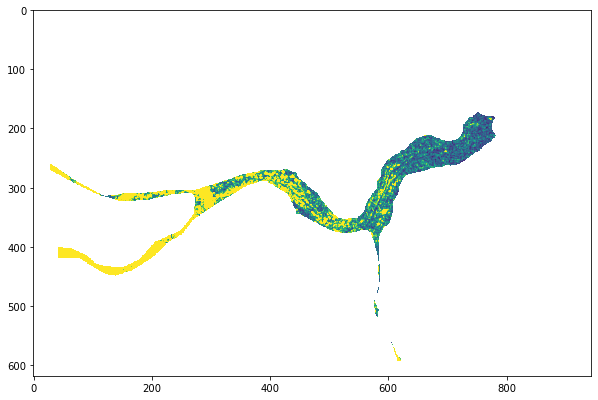

In [14]:
exp.plot_strain_map()

In [15]:
# exp.vx[40:50, 700:710]
exp.vy[150:160, 550:560]
# exp.vx.shape

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]])

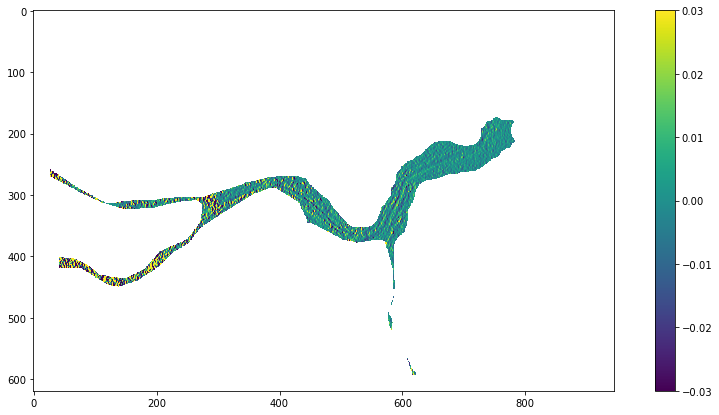

In [16]:
plt.subplots(figsize=(15, 7))
plt.imshow(exp.exx, vmin=-0.03, vmax = 0.03)
plt.colorbar()

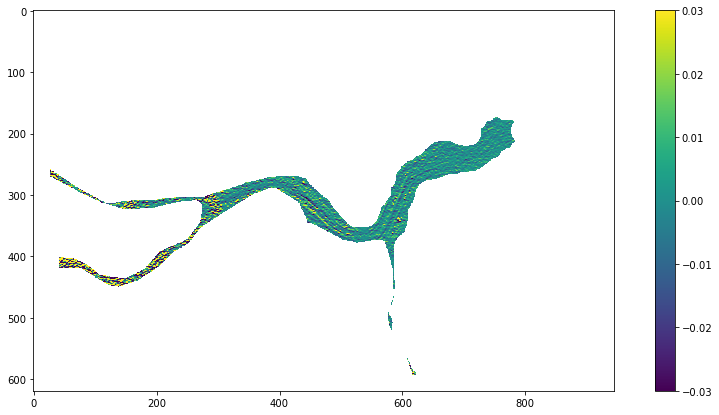

In [17]:
plt.subplots(figsize=(15, 7))
plt.imshow(exp.eyy, vmin=-0.03, vmax = 0.03)
plt.colorbar()

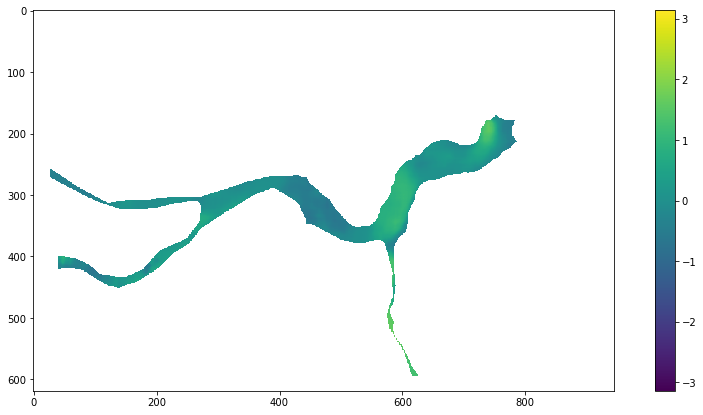

In [18]:
plt.subplots(figsize=(15, 7))
plt.imshow(exp.flow_theta, vmin=-3.1416, vmax = 3.1416)
plt.colorbar()

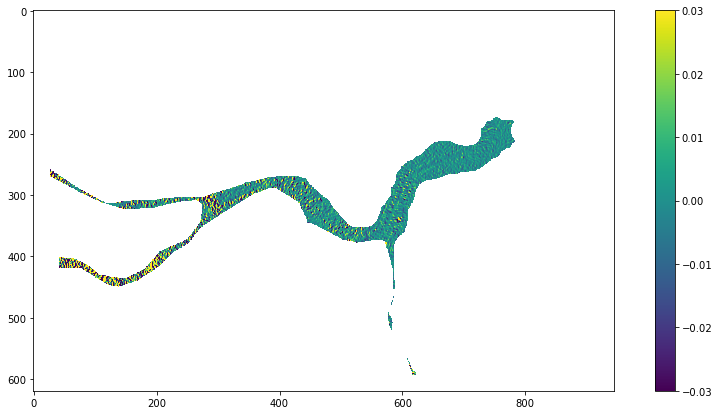

In [19]:
plt.subplots(figsize=(15, 7))
plt.imshow(exp.exx_flow, vmin=-0.03, vmax = 0.03)
plt.colorbar()

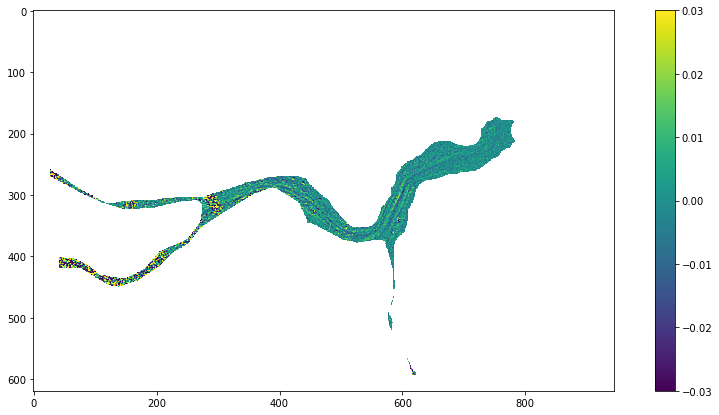

In [20]:
plt.subplots(figsize=(15, 7))
plt.imshow(exp.exy_flow, vmin=-0.03, vmax = 0.03)
plt.colorbar()

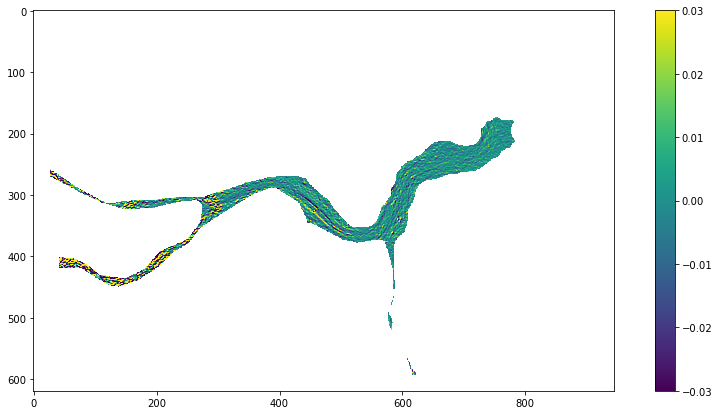

In [21]:
plt.subplots(figsize=(15, 7))
plt.imshow(exp.eyy_flow, vmin=-0.03, vmax = 0.03)
plt.colorbar()

(285.0, 345.0)

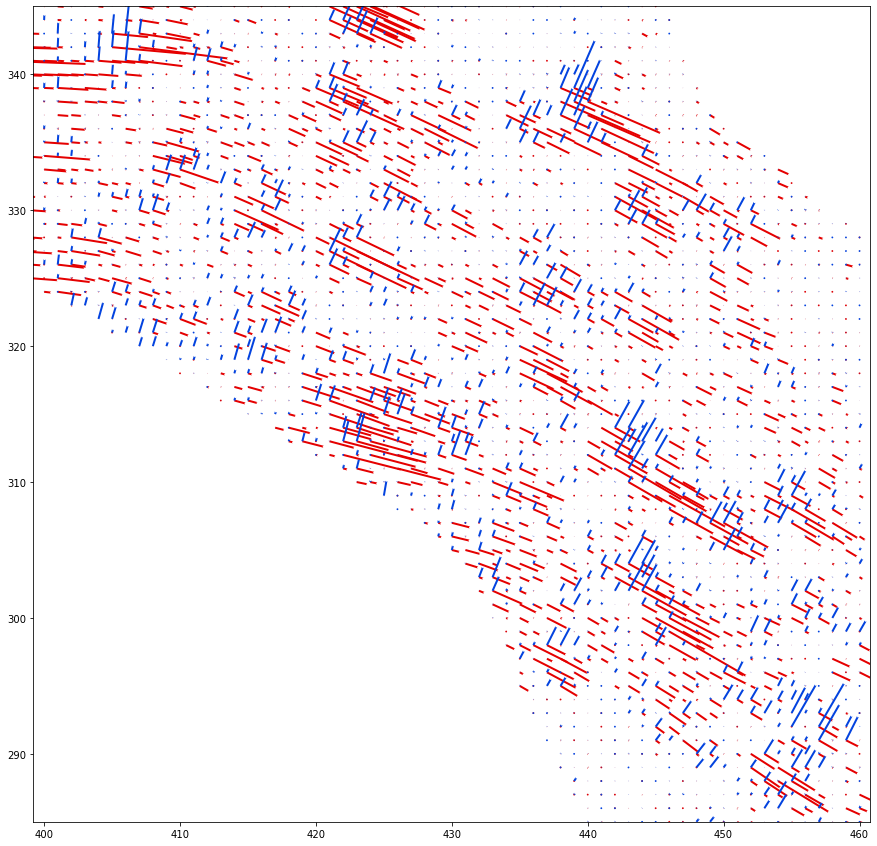

In [18]:
plt.subplots(figsize=(15, 15))
plt.quiver(np.flipud(exp.exx_flow), np.zeros_like(exp.exx_flow), angles=np.rad2deg(np.flipud(exp.flow_theta)), headwidth=0, scale=1, color='xkcd:red')
plt.quiver(np.flipud(exp.exy_flow), np.zeros_like(exp.exy_flow), angles=np.rad2deg(np.flipud(exp.flow_theta))+90, headwidth=0, scale=1, color='xkcd:blue')
plt.axis('equal')
# plt.xlim(380, 420)
# plt.ylim(100, 140)
plt.xlim(400, 460)
plt.ylim(285, 345)

(260.0, 360.0)

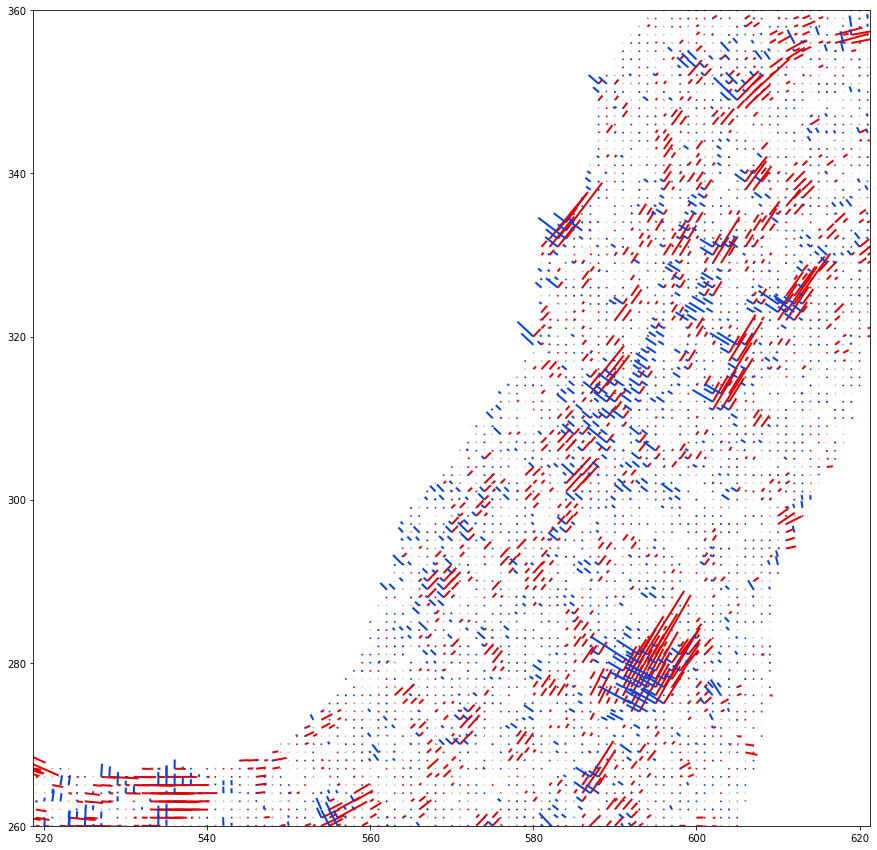

In [19]:
plt.subplots(figsize=(15, 15))
plt.quiver(np.flipud(exp.exx_flow), np.zeros_like(exp.exx_flow), angles=np.rad2deg(np.flipud(exp.flow_theta)), headwidth=0, scale=1, color='xkcd:red')
plt.quiver(np.flipud(exp.exy_flow), np.zeros_like(exp.exy_flow), angles=np.rad2deg(np.flipud(exp.flow_theta))+90, headwidth=0, scale=1, color='xkcd:blue')
plt.axis('equal')
plt.xlim(520, 620)
plt.ylim(260, 360)

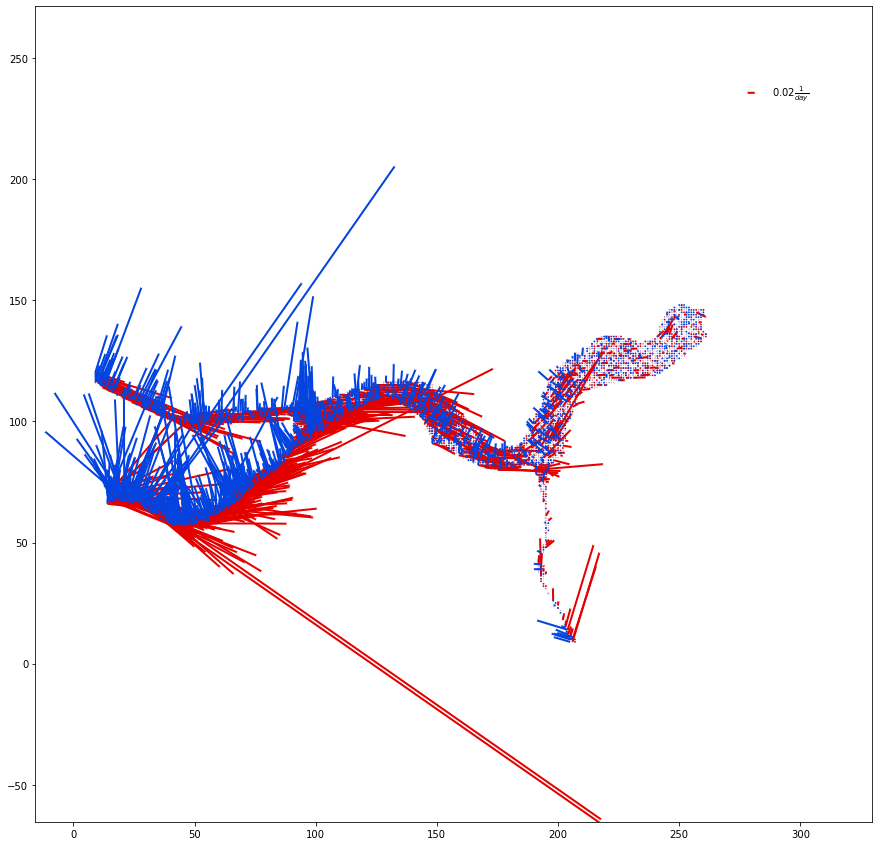

In [20]:
x1 = np.flipud(exp.exx_flow)
x2 = np.flipud(exp.exy_flow)
y = np.zeros_like(exp.exx_flow)
a = np.rad2deg(np.flipud(exp.flow_theta))
sampling_rate = 3
x1 = x1[::sampling_rate, ::sampling_rate]
x2 = x2[::sampling_rate, ::sampling_rate]
y = y[::sampling_rate, ::sampling_rate]
a = a[::sampling_rate, ::sampling_rate]
scale = 1
plt.subplots(figsize=(15, 15))
q1 = plt.quiver(x1, y, angles=a, headwidth=0, scale=scale, color='xkcd:red')
q2 = plt.quiver(x2, y, angles=a+90, headwidth=0, scale=scale, color='xkcd:blue')
plt.axis('equal')
q1k = plt.quiverkey(q1, X=0.8, Y=0.8, U=0.02, label=r'$0.02 \frac{1}{day}$', labelpos='E',
                   coordinates='figure')

In [26]:
exp.exy_flow.shape

(619, 944)

In [65]:
NaNidx = np.isnan(exp.exx_flow)
band4 = np.zeros_like(exp.exx_flow)
band4[~NaNidx] = 1
band4

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [141]:
def stretch(ar, a, b):
    return (ar - a) / b

xx = np.log(np.abs(exp.exx_flow))
yy = np.log(np.abs(exp.eyy_flow))
xy = np.log(np.abs(exp.exy_flow))
xx = stretch(xx, -19, 18)
yy = stretch(yy, -19, 18)
xy = stretch(xy, -19, 18)

tmp = np.stack((xx, yy, xy, band4), axis=2)
# tmp = tmp / 0.005

In [142]:
gg = np.log(np.abs(exp.exx_flow))
print(np.min(gg[~np.isnan(gg)]))
print(np.max(gg[~np.isnan(gg)]))

-16.402264905646362
1.321061682074008


In [143]:
xx[~np.isnan(xx)]

array([0.76838538, 0.68515094, 0.73669917, ..., 0.8910881 , 0.86082999,
       0.80729408])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


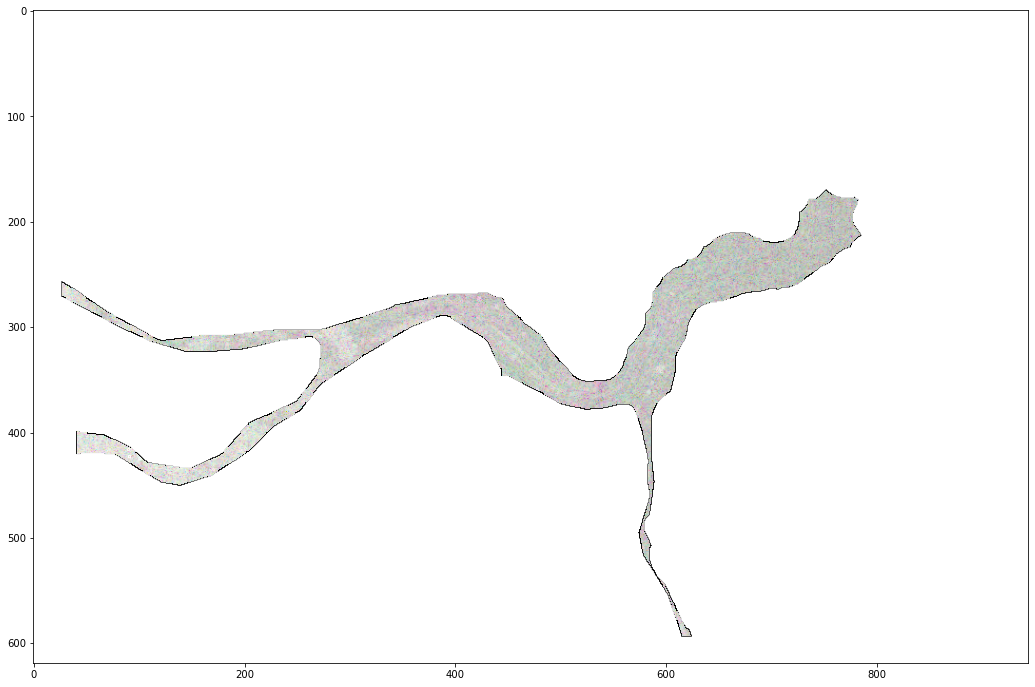

In [144]:
# tmp3[np.isnan(tmp3)] = 1 
plt.subplots(figsize=(25, 12))
plt.imshow(tmp)
# plt.colorbar()

In [109]:
# tmp[300, 600:620, :]
xx = np.log(np.abs(exp.exx_flow))
# exp.eyy_flow[300, 600:620]
xx[300, 600:620]
# tmp.shape

array([-4.48916631, -5.33137432, -4.60669536, -4.38259309, -3.35035261,
       -6.01131548, -3.65131076, -8.1312649 , -4.52492565, -5.16761196,
       -5.10309965, -5.03553927, -6.1322383 , -5.615616  , -4.40321843,
       -4.84620454, -6.48293756, -4.08482725, -3.97564998, -4.92095995])

In [ ]:
# exp.calculate_flow_theta(kernel_size=45)
# plt.subplots(figsize=(15, 7))
# plt.imshow(exp.flow_theta, vmin=-3.1416, vmax = 3.1416)
# plt.colorbar()

In [14]:
exp.__dict__

{'vxfile': '/home/jovyan/Projects/PX_comparison/PX/GIV/u_l34_NAOF_50.tif',
 'vyfile': '/home/jovyan/Projects/PX_comparison/PX/GIV/v_l34_NAOF_50.tif',
 'wfile': '/home/jovyan/Projects/PX_comparison/PX/GIV/pkr_l34_NAOF_50.tif',
 'static_area': None,
 'on_ice_area': '/home/jovyan/Projects/PX_comparison/Bedrock_shp/glacier_V1_Kaskawulsh_s_inwardBuffer600m.shp',
 'nodata': -9999.0,
 'velocity_unit': 'm/day',
 'vx': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'vy': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'xy': arra

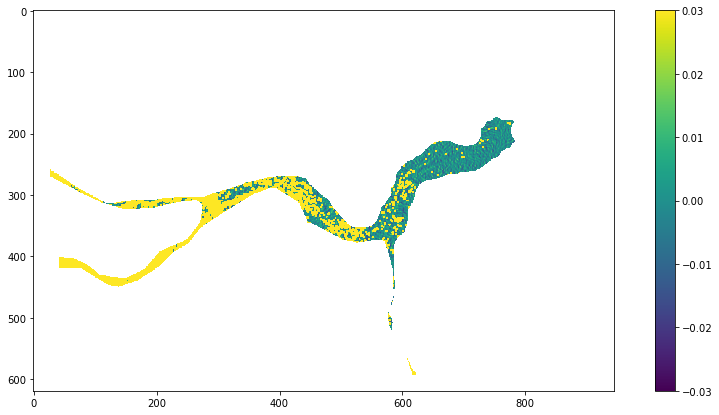

In [18]:
lb = exp.kdepeak_x - exp.metric_alongflow_normal
ub = exp.kdepeak_x + exp.metric_alongflow_normal
outbound = np.logical_or(exp.exx_flow < lb, exp.exx_flow > ub)
tmp = exp.exx_flow[:]
tmp[outbound] = 999
plt.subplots(figsize=(15, 7))
plt.imshow(tmp, vmin=-0.03, vmax = 0.03)
plt.colorbar()

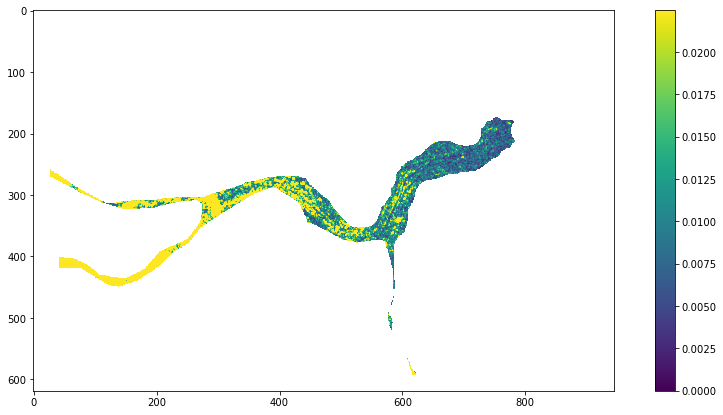

In [35]:
radius = np.sqrt(exp.metric_alongflow_normal * exp.metric_alongflow_shear)
tmp = np.sqrt(exp.exx_flow ** 2 + exp.exy_flow ** 2)

# tmp[tmp > radius] = 999
plt.subplots(figsize=(15, 7))
plt.imshow(tmp, vmin=0, vmax = radius)
plt.colorbar()

Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh


/home/jovyan/.conda/envs/eztrack/lib/python3.9/site-packages/sklearn/neighbors/_kde.py:239: RuntimeWarning: divide by zero encountered in log
  log_density = self.tree_.kernel_density(
/home/jovyan/.conda/envs/eztrack/lib/python3.9/site-packages/sklearn/neighbors/_kde.py:239: RuntimeWarning: divide by zero encountered in log
  log_density = self.tree_.kernel_density(


Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric


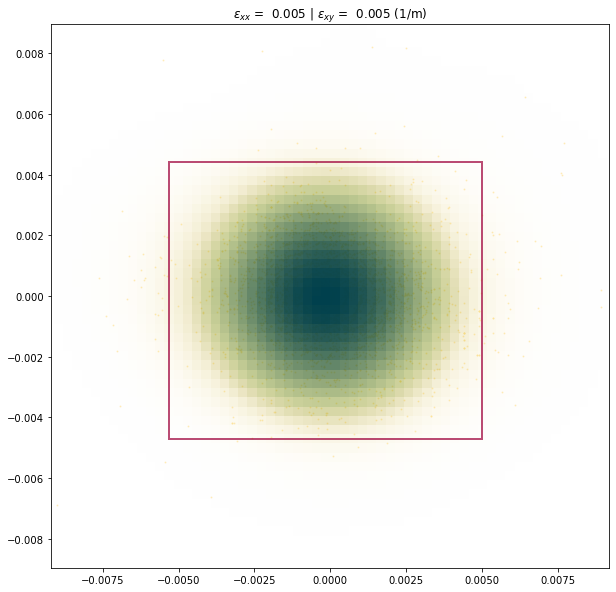

In [24]:
demo = df.loc[147]
exp = glaft.Velocity(vxfile=demo.Vx, vyfile=demo.Vy, on_ice_area=in_shp, wfile=demo.Vx.replace('u_', 'pkr_'))
exp.longitudinal_shear_analysis()
exp.plot_zoomed_extent(metric=2)

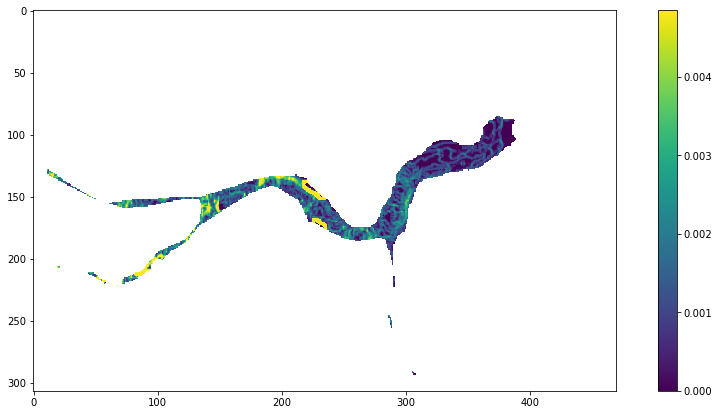

In [26]:
radius = np.sqrt(exp.metric_alongflow_normal * exp.metric_alongflow_shear)
tmp = np.sqrt(exp.exx_flow ** 2 + exp.exy_flow ** 2)

# tmp[tmp > radius] = 999
plt.subplots(figsize=(15, 7))
plt.imshow(tmp, vmin=0, vmax = radius)
plt.colorbar()

In [ ]:
idxs = [80, 78, 82, 79, 81, 83]

fig, axs = plt.subplots(2, 3, figsize=(16, 13))
n = 0
for idx in idxs:
    demo = df.loc[idx]
    label = '-'.join((demo.Software, demo['Template size (px)'], demo['Pixel spacing (px)'], demo.Prefilter)) + '\n' + demo.Subpixel + '\n'
    ax_sel = axs[n // 3, n % 3]
    exp = glaft.Velocity(vxfile=demo.Vx, vyfile=demo.Vy, on_ice_area=in_shp)
    exp.longitudinal_shear_analysis(plot='zoomed', ax=ax_sel)
    ax_sel.set_title(label + ax_sel.get_title())
    n += 1


Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running calculate_metric_static_terrain
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running calculate_metric_static_terrain
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_me

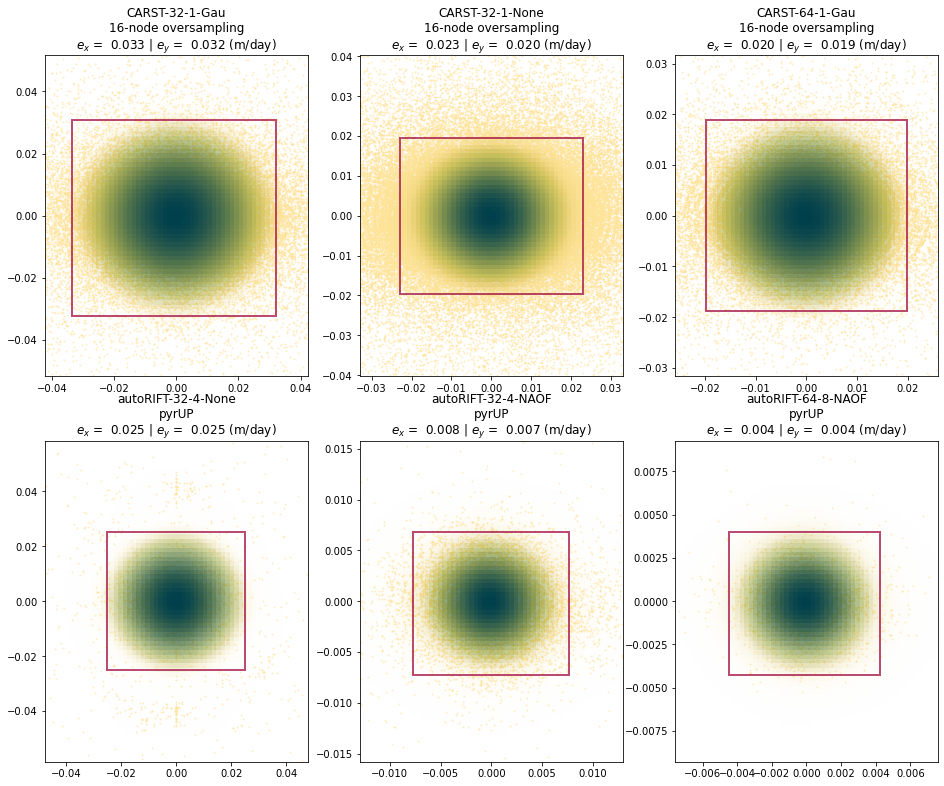

In [10]:
idxs = [54, 56, 63, 136, 144, 147]
# idxs = [80, 56, 63, 136, 144, 147]

fig, axs = plt.subplots(2, 3, figsize=(16, 13))
n = 0
for idx in idxs:
    demo = df.loc[idx]
    label = '-'.join((demo.Software, demo['Template size (px)'], demo['Pixel spacing (px)'], demo.Prefilter)) + '\n' + demo.Subpixel + '\n'
    ax_sel = axs[n // 3, n % 3]
    exp = glaft.Velocity(vxfile=demo.Vx, vyfile=demo.Vy, on_ice_area=in_shp)
    exp.longitudinal_shear_analysis(plot='zoomed', ax=ax_sel)
    ax_sel.set_title(label + ax_sel.get_title())
    n += 1


Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running calculate_metric_static_terrain
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running calculate_metric_static_terrain
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_me

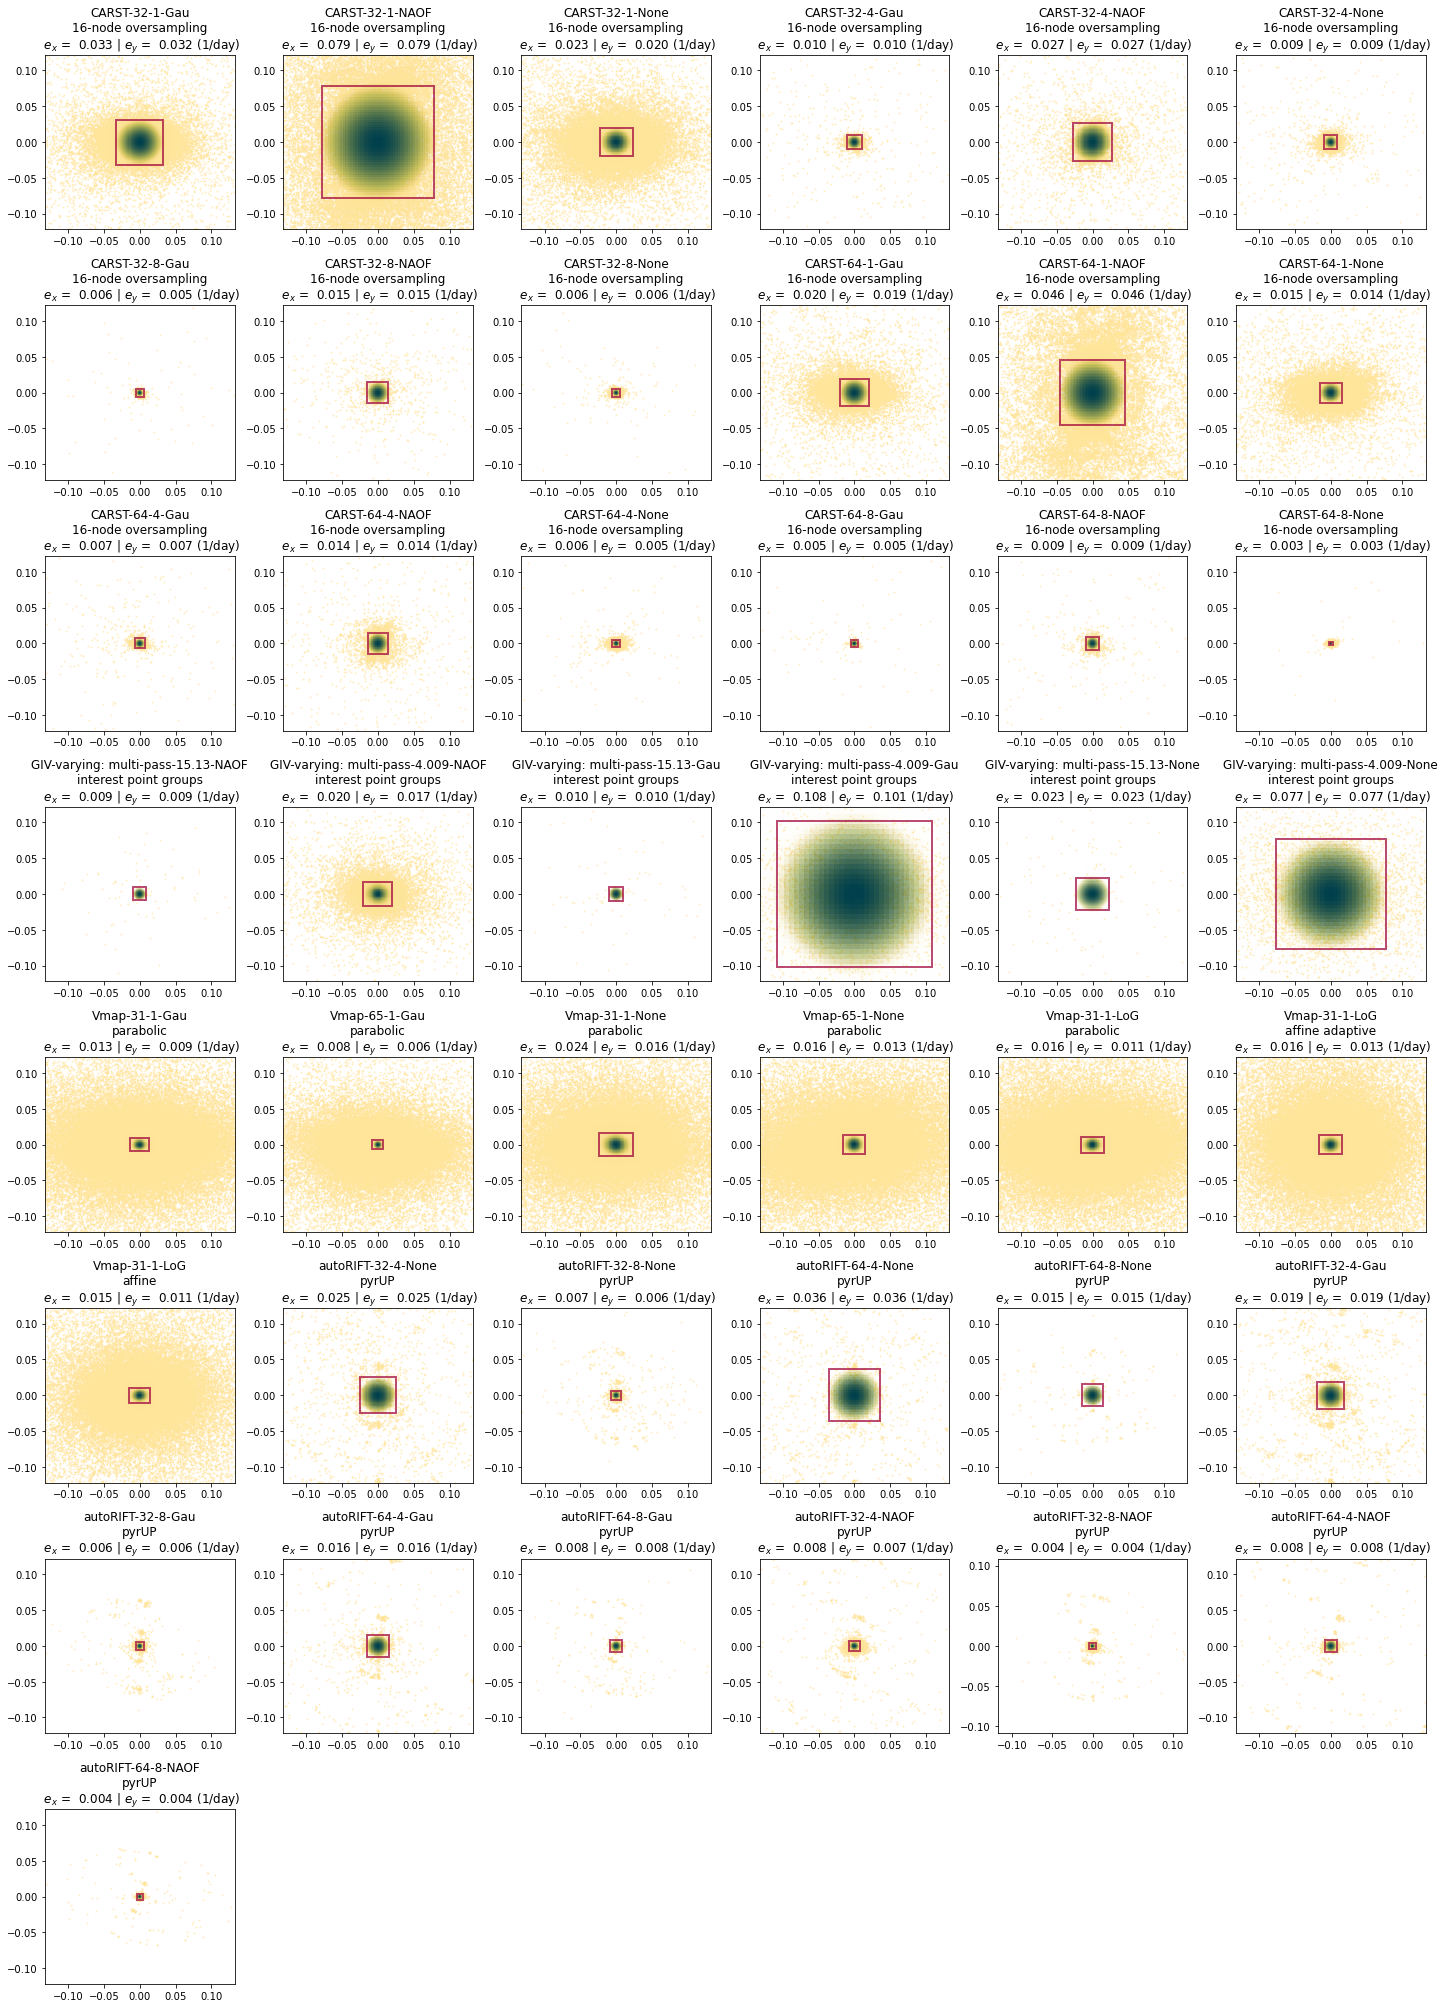

In [82]:
# demo = df.loc[np.logical_and(df['Date'] == 'LS8-20180802-20180818', df['Subpixel'] != 'affine')]
demo = df.loc[df['Date'] == 'LS8-20180802-20180818']
fig, ax3 = plt.subplots(8, 6, figsize=(20, 28))

n = 0

for idx, row in demo.iterrows():
    label = '-'.join((row.Software, row['Template size (px)'], row['Pixel spacing (px)'], row.Prefilter)) + '\n' + row.Subpixel + '\n '
    ax_sel = ax3[n // 6, n % 6]
    ax_sel.axis('equal')
    
    exp = glaft.Velocity(vxfile=row.Vx, vyfile=row.Vy, on_ice_area=in_shp, velocity_unit='1/day')
    exp.longitudinal_shear_analysis(plot='zoomed', ax=ax_sel)
    ax_sel.set_xlim(-0.12, 0.12)
    ax_sel.set_ylim(-0.12, 0.12)
    ax_sel.set_title(label + ax_sel.get_title())
    n += 1
    
for i in range(n, 48):
    ax_sel = ax3[i // 6, i % 6]
    fig.delaxes(ax_sel)
    
plt.tight_layout()
fig.patch.set_facecolor('xkcd:white')
fig.savefig('tmp4.png')

Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running e

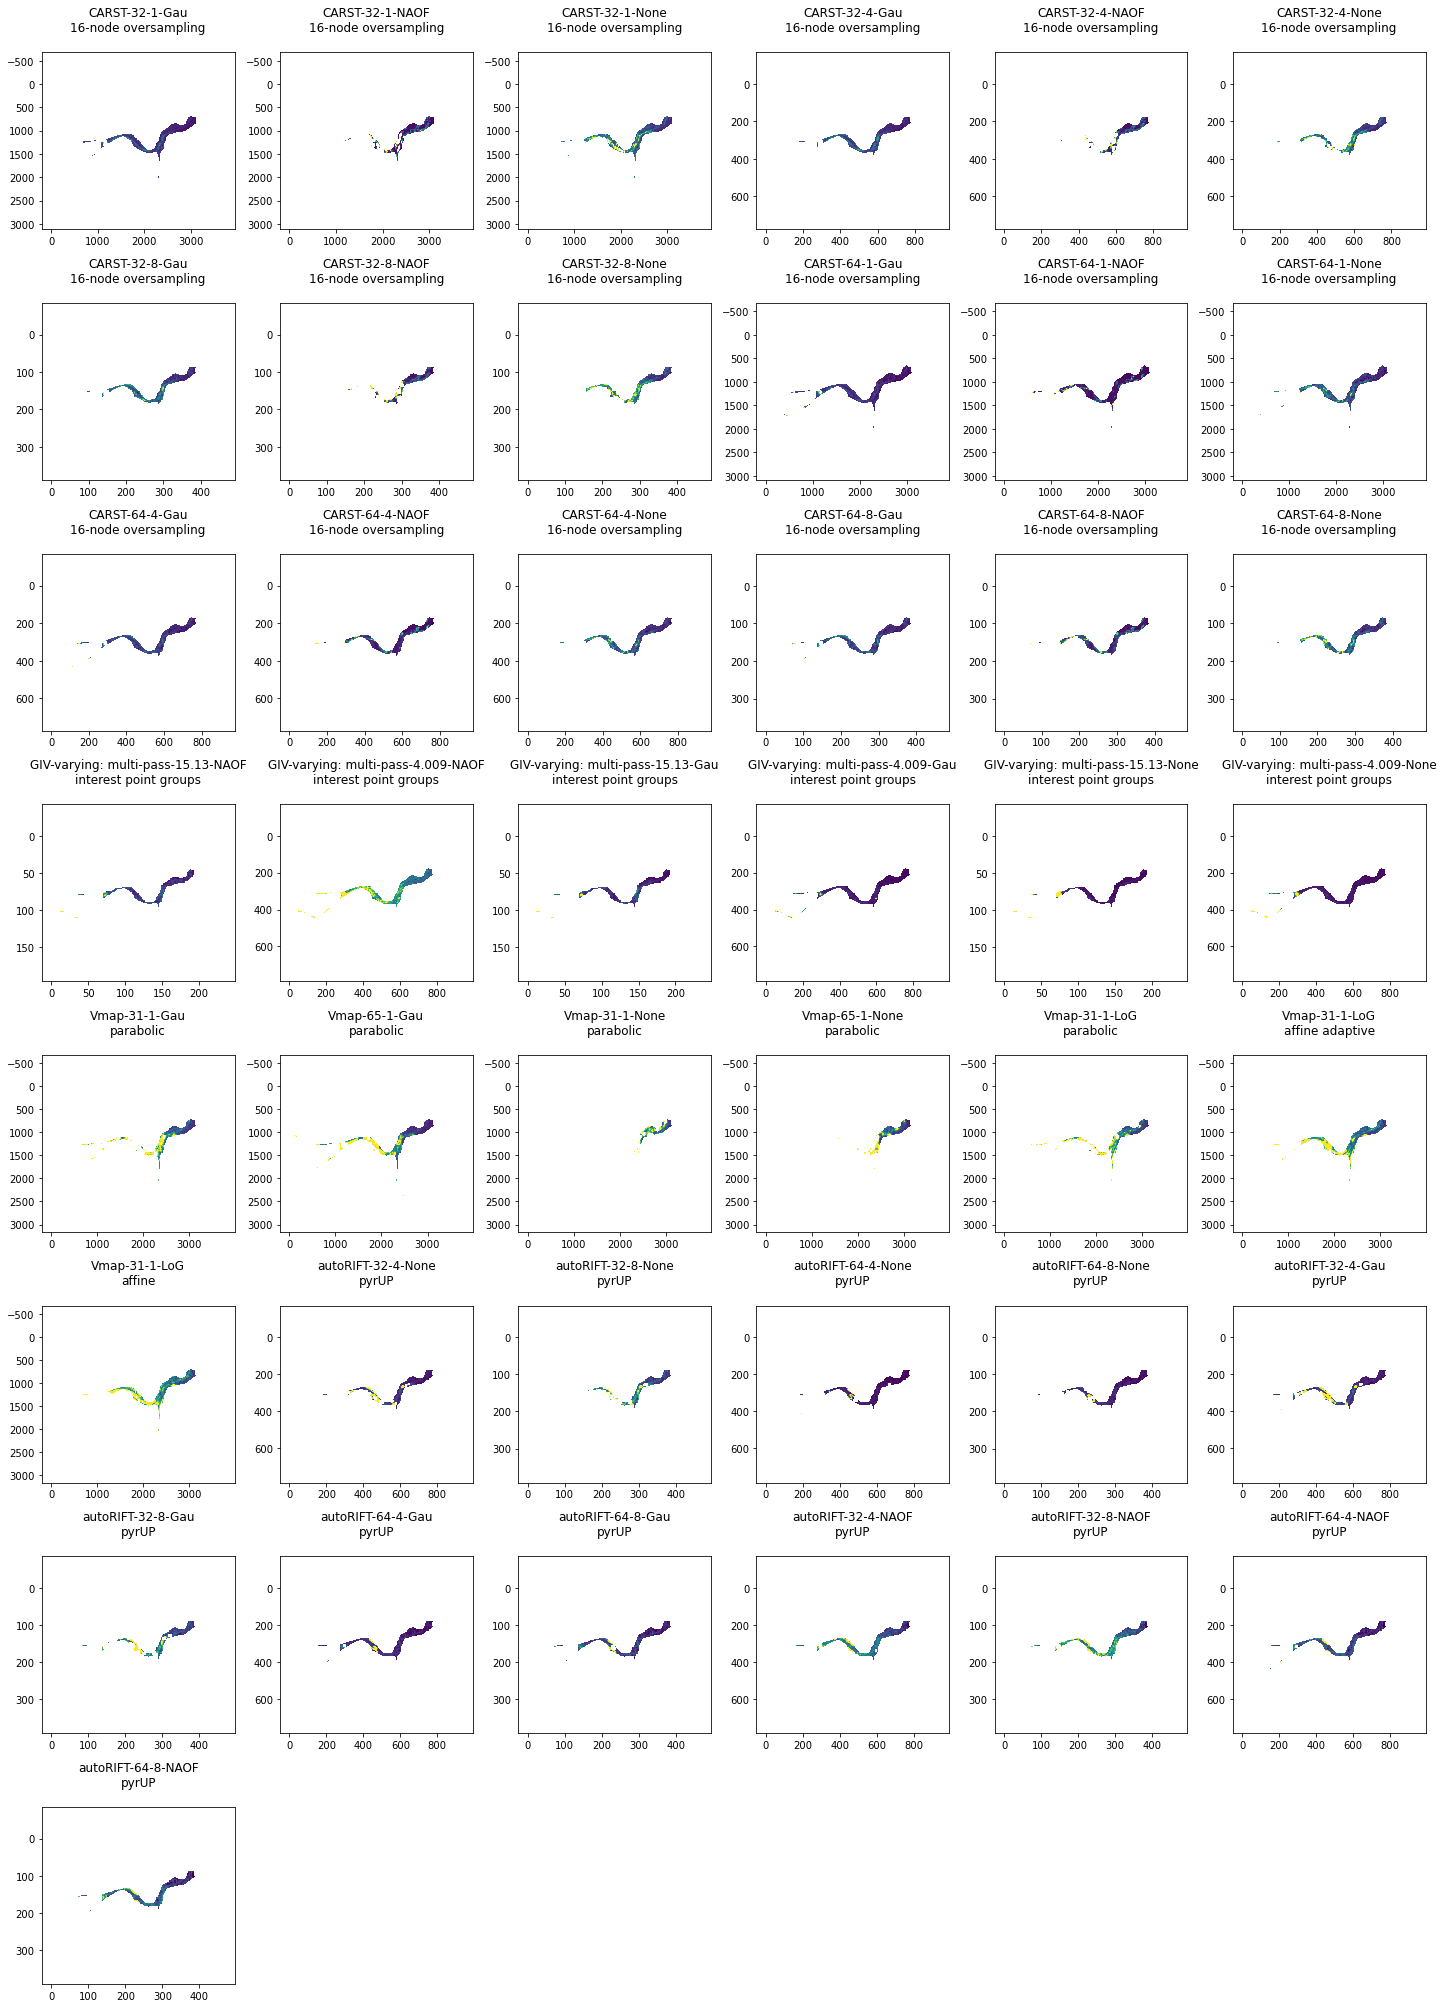

In [23]:
# demo = df.loc[np.logical_and(df['Date'] == 'LS8-20180802-20180818', df['Subpixel'] != 'affine')]
demo = df.loc[df['Date'] == 'LS8-20180802-20180818']
fig, ax3 = plt.subplots(8, 6, figsize=(20, 28))

n = 0

for idx, row in demo.iterrows():
    label = '-'.join((row.Software, row['Template size (px)'], row['Pixel spacing (px)'], row.Prefilter)) + '\n' + row.Subpixel + '\n '
    ax_sel = ax3[n // 6, n % 6]
    ax_sel.axis('equal')
    
    exp = glaft.Velocity(vxfile=row.Vx, vyfile=row.Vy, on_ice_area=in_shp, velocity_unit='1/day')
    # exp.longitudinal_shear_analysis(plot='zoomed', ax=ax_sel)
    exp.longitudinal_shear_analysis()
    exp.plot_strain_map(ax=ax_sel)
    # ax_sel.set_xlim(-0.12, 0.12)
    # ax_sel.set_ylim(-0.12, 0.12)
    ax_sel.set_title(label + ax_sel.get_title())
    n += 1
    
for i in range(n, 48):
    ax_sel = ax3[i // 6, i % 6]
    fig.delaxes(ax_sel)
    
plt.tight_layout()
fig.patch.set_facecolor('xkcd:white')
fig.savefig('tmp5.png')

In [21]:
vx = np.array([[1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [3, 4, 5, 6, 7], [4, 5, 6, 7, 8], [5, 6, 7, 8, 9]])
vy = np.array([[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [5, 5, 5, 5, 5]])
vx = vx.astype(float)
vy = vy.astype(float)

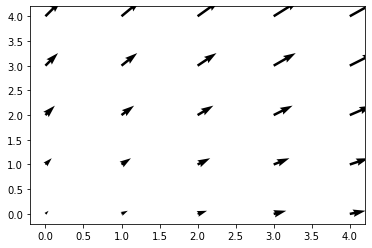

In [22]:
plt.quiver(vx,vy)

In [23]:
exx, eyy, exy = exp._calculate_strain_rate(vx, vy)
flow_theta = np.arctan2(vy, vx)
exx_rot, eyy_rot, exy_rot = exp._rotate_strain_rate(exx, eyy, exy, flow_theta)
exp._rotate_strain_rate(exx, eyy, exy, flow_theta)

(array([[        nan,         nan,         nan,         nan,         nan],
        [        nan, 11.69230769, 11.2       , 10.75862069,         nan],
        [        nan, 11.84      , 11.52941176, 11.2       ,         nan],
        [        nan, 11.90243902, 11.69230769, 11.44615385,         nan],
        [        nan,         nan,         nan,         nan,         nan]]),
 array([[       nan,        nan,        nan,        nan,        nan],
        [       nan, 4.30769231, 4.8       , 5.24137931,        nan],
        [       nan, 4.16      , 4.47058824, 4.8       ,        nan],
        [       nan, 4.09756098, 4.30769231, 4.55384615,        nan],
        [       nan,        nan,        nan,        nan,        nan]]),
 array([[       nan,        nan,        nan,        nan,        nan],
        [       nan, 1.53846154, 2.4       , 2.89655172,        nan],
        [       nan, 1.12      , 1.88235294, 2.4       ,        nan],
        [       nan, 0.87804878, 1.53846154, 2.03076923,     

(-0.2, 4.2, -0.2, 4.2)

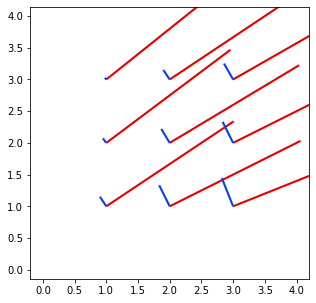

In [24]:
plt.subplots(figsize=(5, 5))
plt.quiver(exx_rot, np.zeros_like(exx_rot), angles=np.rad2deg(flow_theta), headwidth=0, scale=20, color='xkcd:red')
plt.quiver(exy_rot, np.zeros_like(exy_rot), angles=np.rad2deg(flow_theta)+90, headwidth=0, scale=20, color='xkcd:blue')
plt.axis('equal')

(210.0, 360.0)

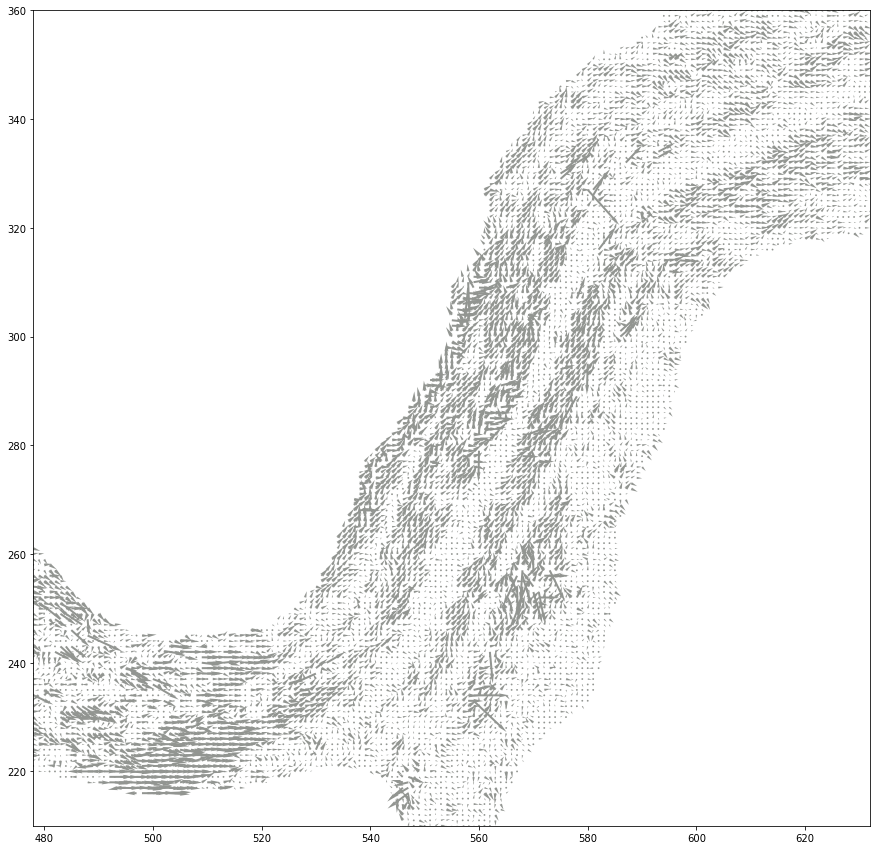

In [25]:
plt.subplots(figsize=(15, 15))
plt.quiver(np.flipud(exp.vx), np.flipud(exp.vy), headwidth=2, scale=50, color='xkcd:gray')
plt.axis('equal')
plt.xlim(480, 630)
plt.ylim(210, 360)

In [5]:
demo = df.loc[54]
demo.Vx

'/home/jovyan/Projects/PX_comparison/PX/CARST/20180802_20180818_LS8-062017_chip32_skip1_Gau/20180802-20180818_velo-raw_vx.tif'

In [6]:
exp = glaft.Velocity(vxfile=demo.Vx, vyfile=demo.Vy, static_area=in_shp, on_ice_area=in_shp)

In [7]:
exp.clip_on_ice_area()
exp.get_grid_spacing()

Running clip_on_ice_area
Running get_grid_spacing


In [9]:
%%time
exp.calculate_flow_theta()

Running calculate_flow_theta
CPU times: user 2min 8s, sys: 256 ms, total: 2min 8s
Wall time: 2min 8s


In [52]:
exp.flow_theta

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
from scipy.signal import medfilt

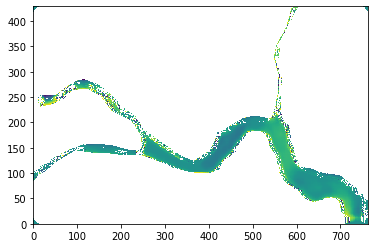

In [72]:
plt.pcolormesh(exp.flow_theta)

CPU times: user 7.82 s, sys: 6.43 ms, total: 7.82 s
Wall time: 7.81 s


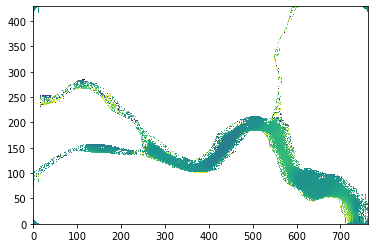

In [66]:
%%time
plt.pcolormesh(medfilt(exp.flow_theta, kernel_size=25))

In [57]:
from scipy.ndimage import median_filter

CPU times: user 754 ms, sys: 69 µs, total: 754 ms
Wall time: 753 ms


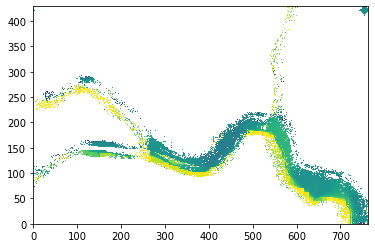

In [68]:
%%time
plt.pcolormesh(median_filter(exp.flow_theta, size=25))

In [61]:
from scipy.signal import medfilt2d

CPU times: user 392 ms, sys: 7.87 ms, total: 400 ms
Wall time: 399 ms


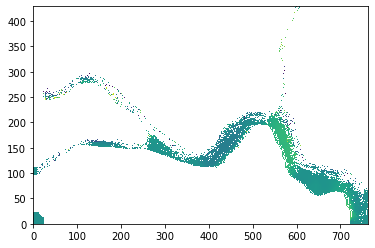

In [73]:
%%time
plt.pcolormesh(medfilt2d(exp.flow_theta, kernel_size=25))